In [1]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/shopping_behavior_updated.csv")

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Image URL
0,1,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,https://www.collinsdictionary.com/images/thumb...
1,2,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,https://www.collinsdictionary.com/images/thumb...
2,3,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,https://www.collinsdictionary.com/images/thumb...
3,4,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,https://www.collinsdictionary.com/images/thumb...
4,5,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,https://www.collinsdictionary.com/images/thumb...


In [4]:
# Drop unnecessary columns
unnecessary_columns = ['Customer ID', 'Image URL']
df.drop(columns=unnecessary_columns, inplace=True)

In [5]:
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
# Count the number of null values in each column
null_counts = df.isnull().sum()
null_counts

Age                       28
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating              0
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

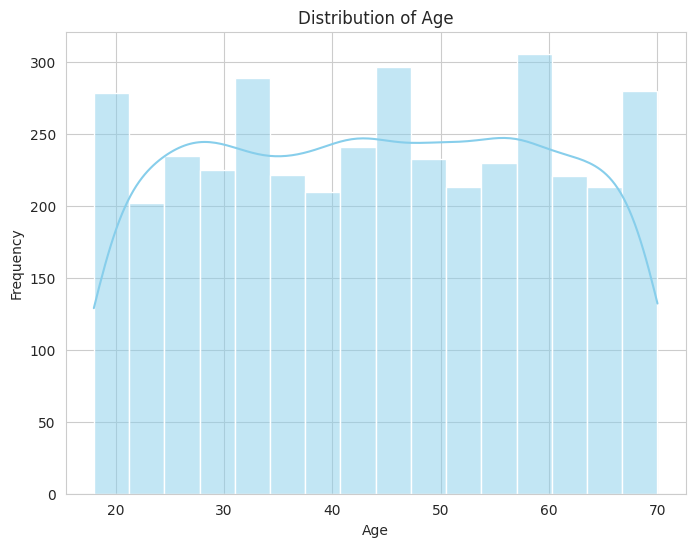

In [37]:
# Plot the distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Replace missing values in 'Age' column with mean age
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)


/tmp/ipykernel_84867/3598412481.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_age, inplace=True)


In [8]:
# Count the number of null values in each column
null_counts = df.isnull().sum()
null_counts

Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [9]:
# Perform basic descriptive statistics
display(df.describe())

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.062758,66.854618,3.749949,25.351538
std,15.135345,257.109260,0.716223,14.447125
min,18.000000,0.450000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,11234.000000,5.000000,50.000000


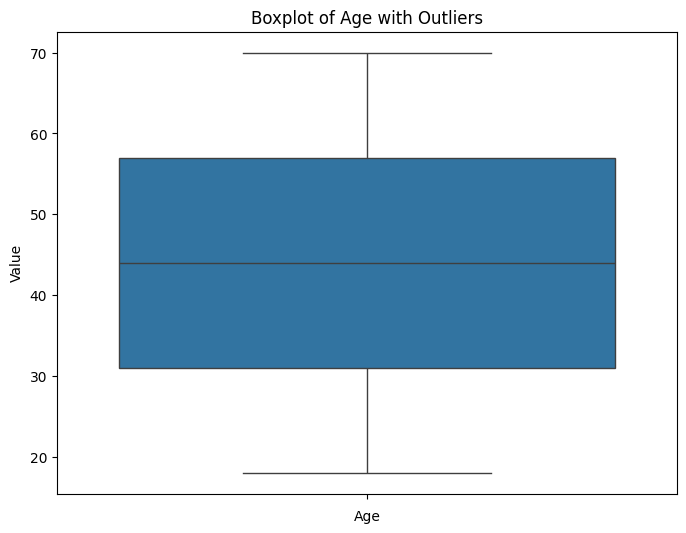

Count of outliers: 0
Indices of outliers: Index([], dtype='int64')


In [10]:
# Define the numerical variable
variable = 'Age'

# Calculate IQR for the variable
Q1 = df[variable].quantile(0.25)
Q3 = df[variable].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Identify outliers
outliers = (df[variable] < (Q1 - threshold * IQR)) | (df[variable] > (Q3 + threshold * IQR))

# Create a boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y=variable)
plt.title('Boxplot of Age with Outliers')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

# Print the count and indices of outliers
print("Count of outliers:", outliers.sum())
print("Indices of outliers:", df[outliers].index)

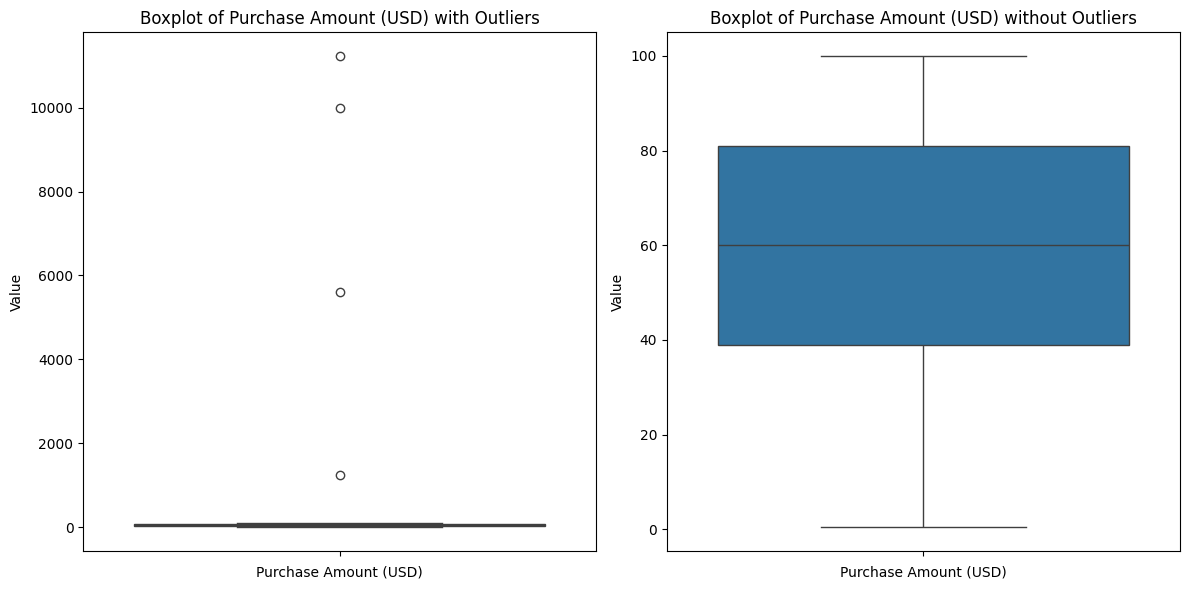

Count of outliers: 4
Indices of outliers: Index([], dtype='int64')


/tmp/ipykernel_84867/73513228.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Indices of outliers:", df[outliers].index)


In [11]:
# Define the numerical variable
variable = 'Purchase Amount (USD)'

# Calculate IQR for the variable
Q1 = df[variable].quantile(0.25)
Q3 = df[variable].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Identify outliers
outliers = (df[variable] < (Q1 - threshold * IQR)) | (df[variable] > (Q3 + threshold * IQR))



# Create a boxplot to visualize outliers
plt.figure(figsize=(12, 6))

# Plot boxplot with outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y=variable)
plt.title('Boxplot of Purchase Amount (USD) with Outliers')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Value')

# Filter the dataframe to remove outliers
df = df[~outliers]

# Plot boxplot without outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y=variable)
plt.title('Boxplot of Purchase Amount (USD) without Outliers')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Print the count and indices of outliers
print("Count of outliers:", outliers.sum())
print("Indices of outliers:", df[outliers].index)


In [12]:
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3896.000000,3896.000000,3896.000000,3896.000000
mean,44.059229,59.718945,3.749692,25.359600
std,15.138059,23.740410,0.716058,14.449782
min,18.000000,0.450000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


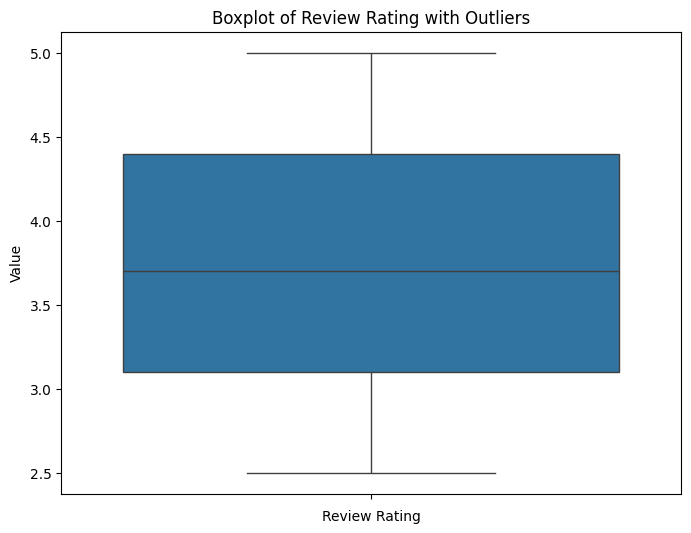

Count of outliers for Review Rating : 0
Indices of outliers for Review Rating : Index([], dtype='int64')


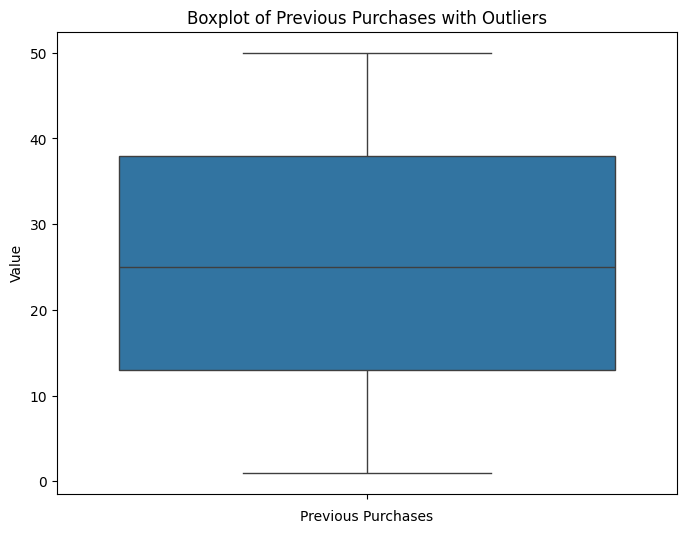

Count of outliers for Previous Purchases : 0
Indices of outliers for Previous Purchases : Index([], dtype='int64')


In [13]:
# Define the numerical variables
variables = ['Review Rating', 'Previous Purchases']

# Calculate IQR for each variable
for variable in variables:
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1

    # Define the threshold for outliers
    threshold = 1.5

    # Identify outliers
    outliers = (df[variable] < (Q1 - threshold * IQR)) | (df[variable] > (Q3 + threshold * IQR))

    # Create a boxplot to visualize outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=variable)
    plt.title(f'Boxplot of {variable} with Outliers')
    plt.xlabel(variable)
    plt.ylabel('Value')
    plt.show()

    # Print the count and indices of outliers
    print("Count of outliers for", variable, ":", outliers.sum())
    print("Indices of outliers for", variable, ":", df[outliers].index)


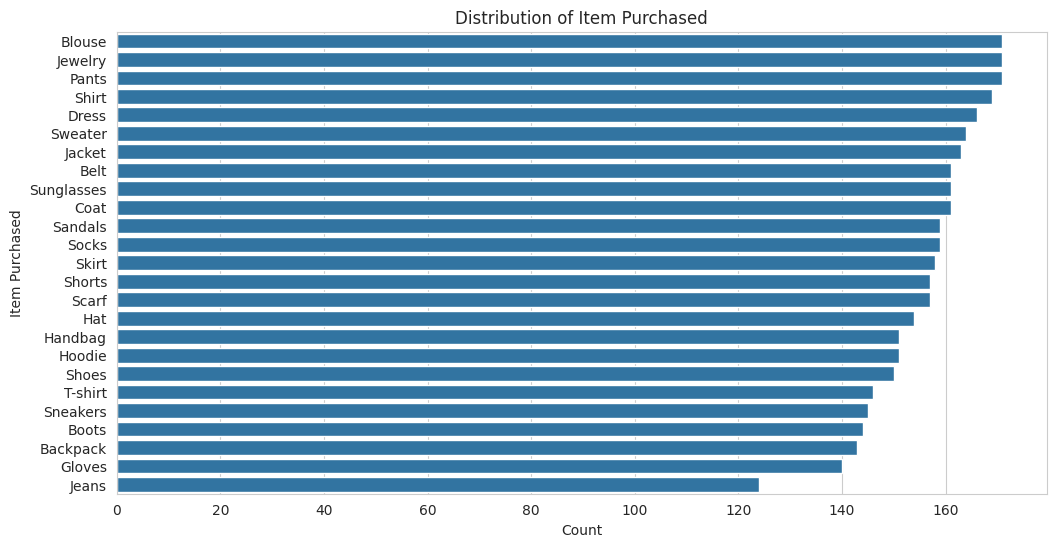

In [14]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plot the distribution of the target variable (item purchased)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="Item Purchased", order=df["Item Purchased"].value_counts().index)
plt.title("Distribution of Item Purchased")
plt.xlabel("Count")
plt.ylabel("Item Purchased")
plt.show()

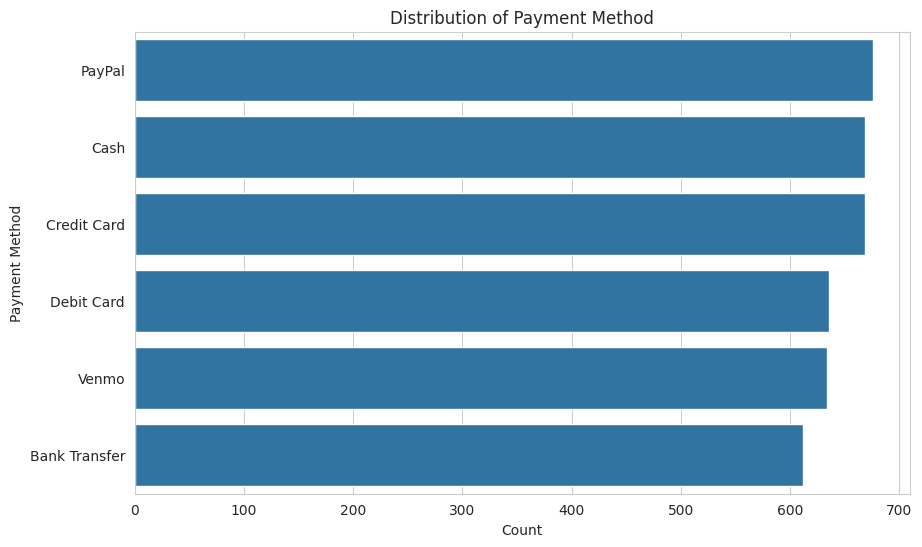

In [15]:
# Plot the distribution of the target variable (Payment Method)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="Payment Method", order=df["Payment Method"].value_counts().index)
plt.title("Distribution of Payment Method")
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.show()

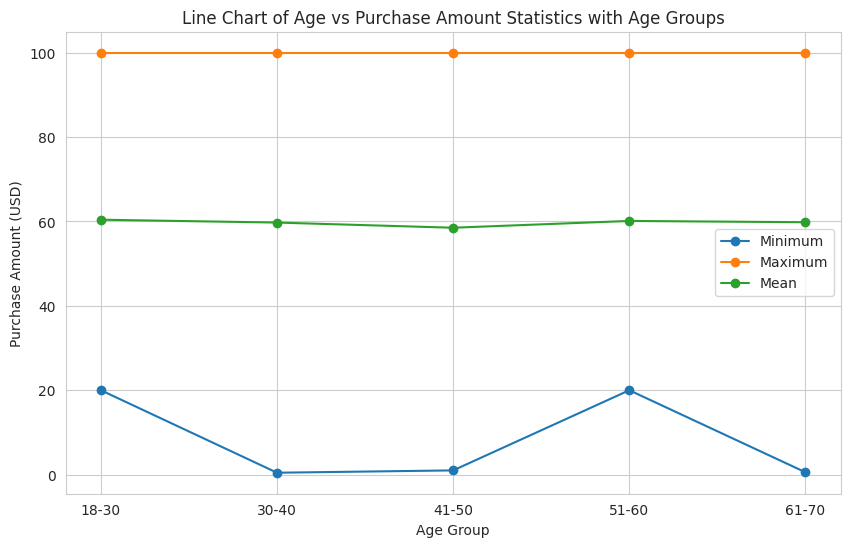

In [42]:
# Define the age groups
age_groups = [
    (18, 30),
    (30, 40),
    (41, 50),
    (51, 60),
    (61, 70)
]

# Define the numerical variable to compare with age
numerical_variable = 'Purchase Amount (USD)'

# Create empty lists to store the minimum, maximum, and mean values
min_values = []
max_values = []
mean_values = []
age_range_labels = []

# Iterate over each age group
for start_age, end_age in age_groups:
    age_range = f'{start_age}-{end_age}'
    age_filter = (df['Age'] >= start_age) & (df['Age'] <= end_age)
    subset_data = df[age_filter][numerical_variable]
    
    # Calculate minimum, maximum, and mean values
    min_value = subset_data.min()
    max_value = subset_data.max()
    mean_value = subset_data.mean()
    
    # Append values to respective lists
    min_values.append(min_value)
    max_values.append(max_value)
    mean_values.append(mean_value)
    age_range_labels.append(age_range)

# Create a line chart to visualize the min, max, and mean values for each age group
plt.figure(figsize=(10, 6))
plt.plot(age_range_labels, min_values, marker='o', label='Minimum')
plt.plot(age_range_labels, max_values, marker='o', label='Maximum')
plt.plot(age_range_labels, mean_values, marker='o', label='Mean')

plt.title('Line Chart of Age vs Purchase Amount Statistics with Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount (USD)')
plt.legend()
plt.grid(True)
plt.show()

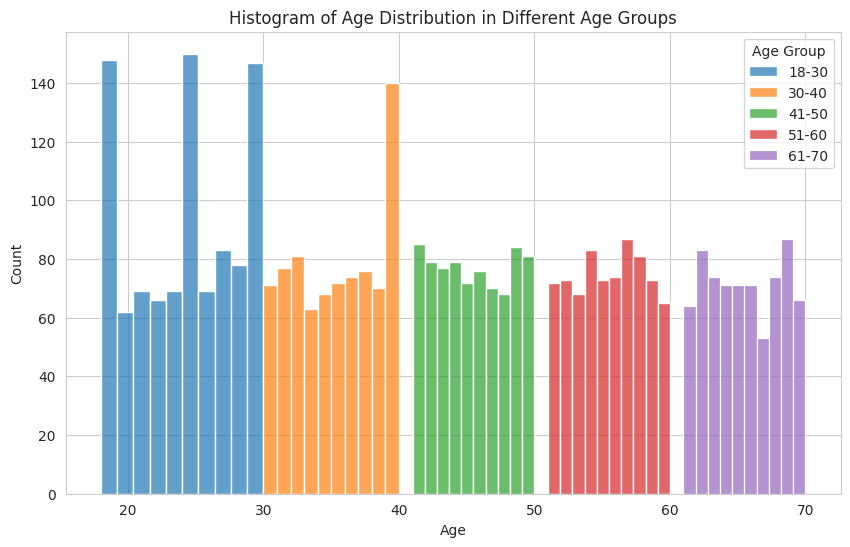

In [43]:
plt.figure(figsize=(10, 6))

# Iterate over each age group
for start_age, end_age in age_groups:
    age_range = f'{start_age}-{end_age}'
    age_filter = (df['Age'] >= start_age) & (df['Age'] <= end_age)
    subset_data = df[age_filter]

    # Plot histogram for the current age group
    sns.histplot(data=subset_data, x='Age', bins=10, label=age_range, alpha=0.7)

plt.title('Histogram of Age Distribution in Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

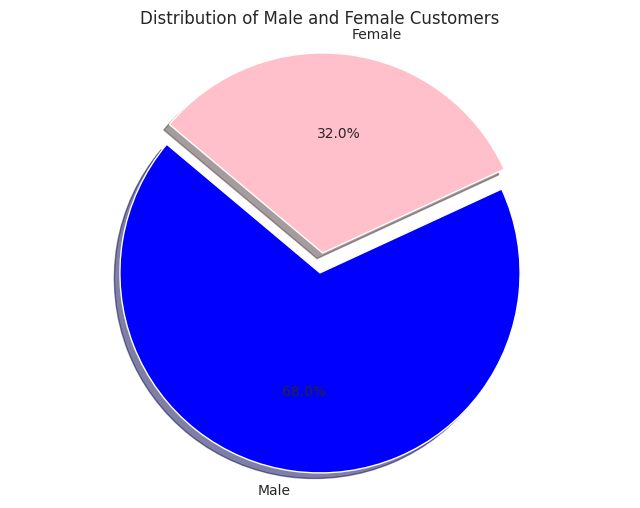

In [44]:
# Count the number of male and female customers
male_count = df[df['Gender'] == 'Male'].shape[0]
female_count = df[df['Gender'] == 'Female'].shape[0]

# Create a pie chart
labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['blue', 'pink']
explode = (0.1, 0)  # explode the 1st slice (Male)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Male and Female Customers')
plt.show()

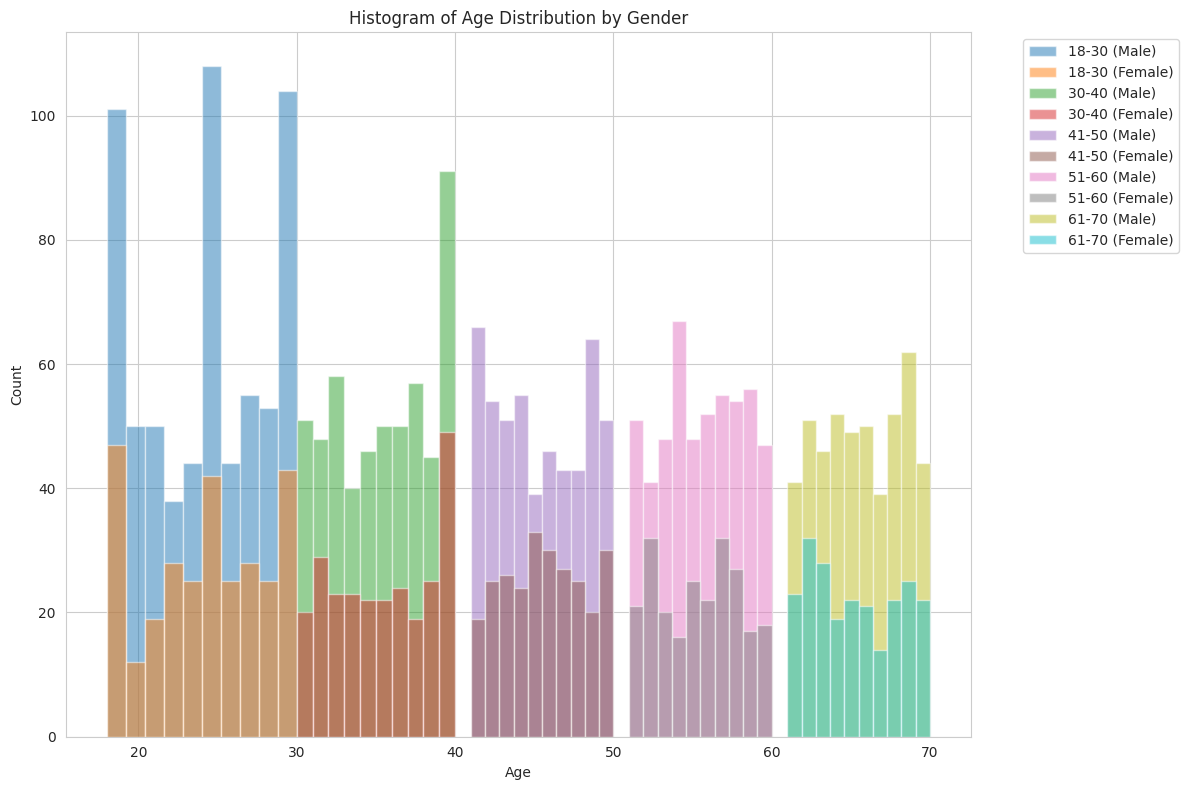

In [47]:
plt.figure(figsize=(12, 8))

# Iterate over each age group
for start_age, end_age in age_groups:
    age_range = f'{start_age}-{end_age}'
    age_filter = (df['Age'] >= start_age) & (df['Age'] <= end_age)
    subset_data = df[age_filter]

    # Plot histogram for male customers in the current age group
    male_subset_data = subset_data[subset_data['Gender'] == 'Male']
    plt.hist(male_subset_data['Age'], bins=10, alpha=0.5, label=f'{age_range} (Male)')

    # Plot histogram for female customers in the current age group
    female_subset_data = subset_data[subset_data['Gender'] == 'Female']
    plt.hist(female_subset_data['Age'], bins=10, alpha=0.5, label=f'{age_range} (Female)')

plt.title('Histogram of Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')

# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()  # Ensures all elements fit within the figure area
plt.show()

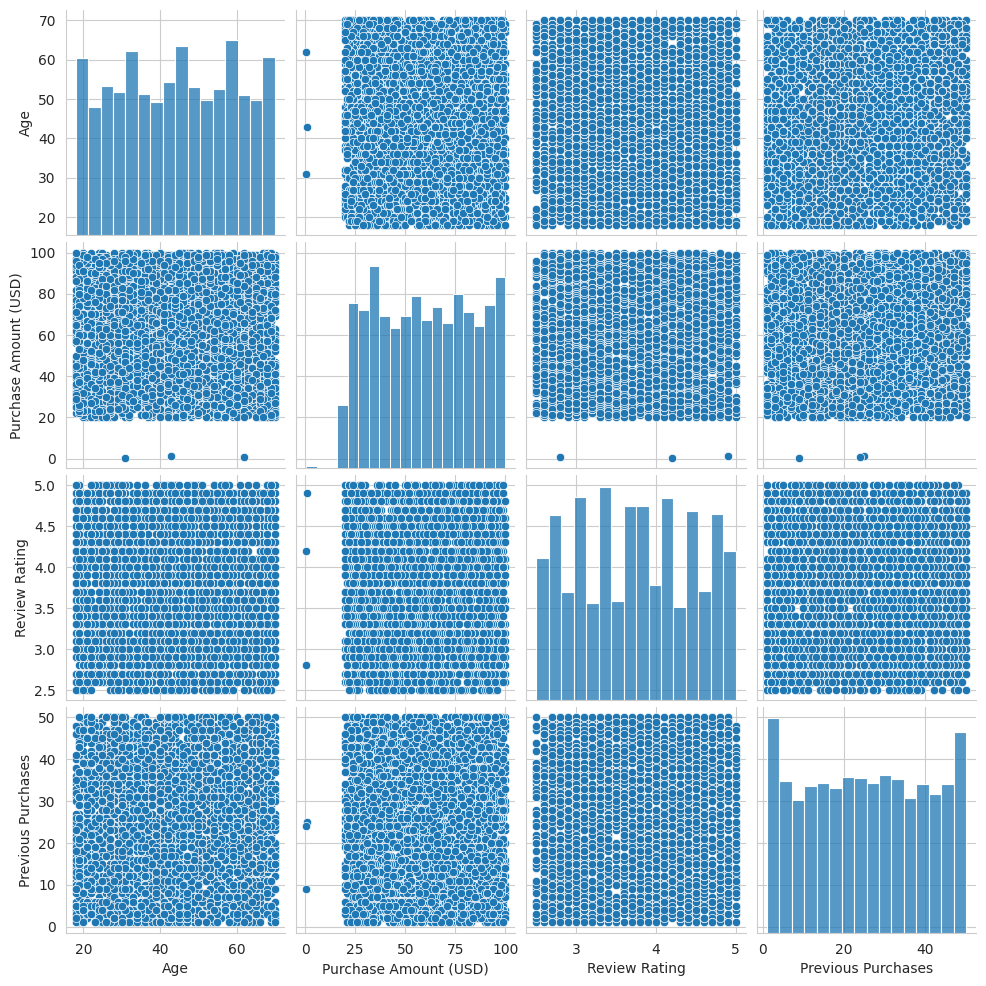

In [23]:

# Select the numerical variables you want to include in the pair plot
numerical_vars = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Create a pair plot
sns.pairplot(df[numerical_vars])

# Display the plot
plt.show()


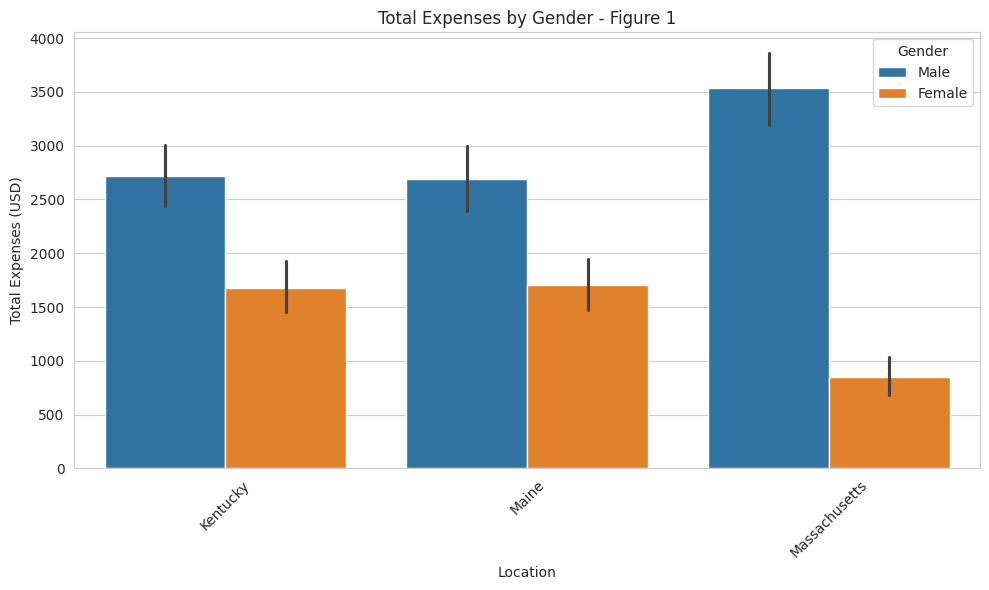

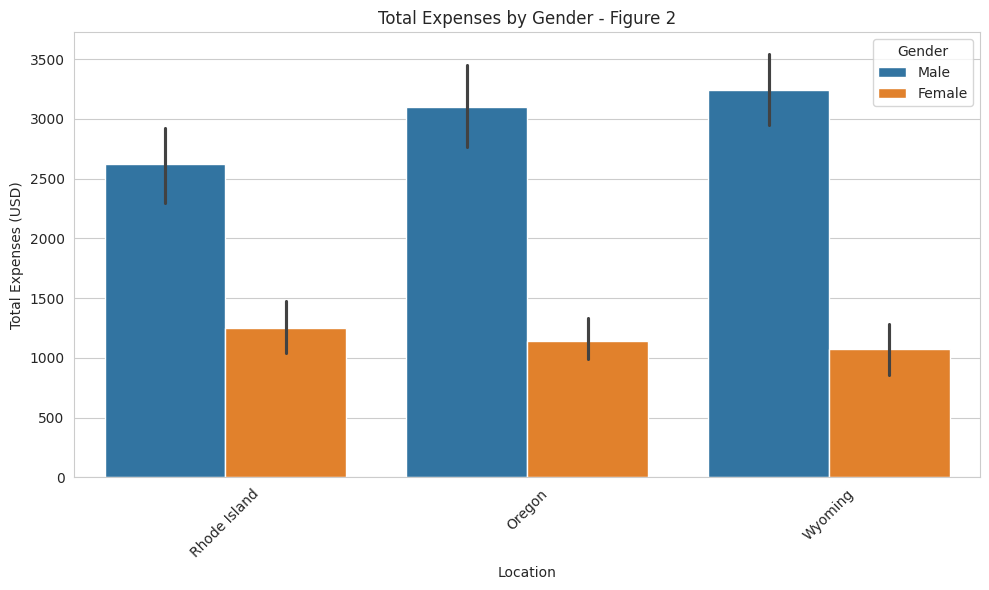

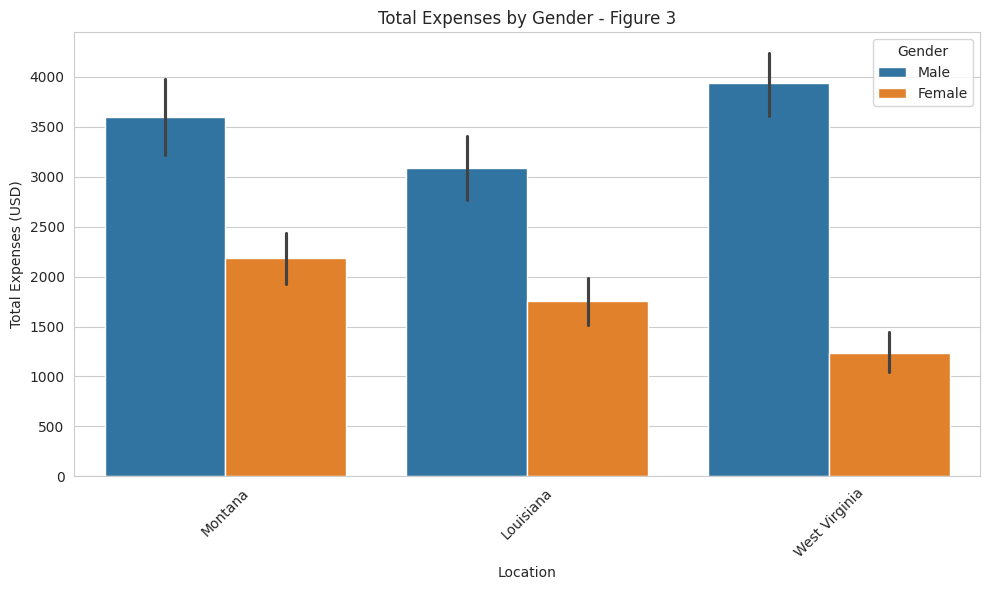

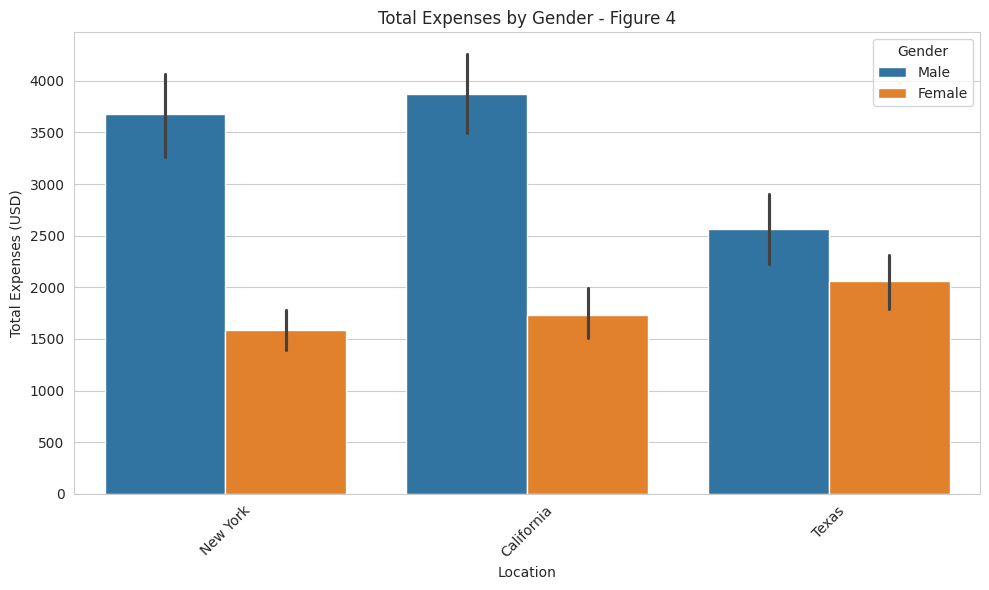

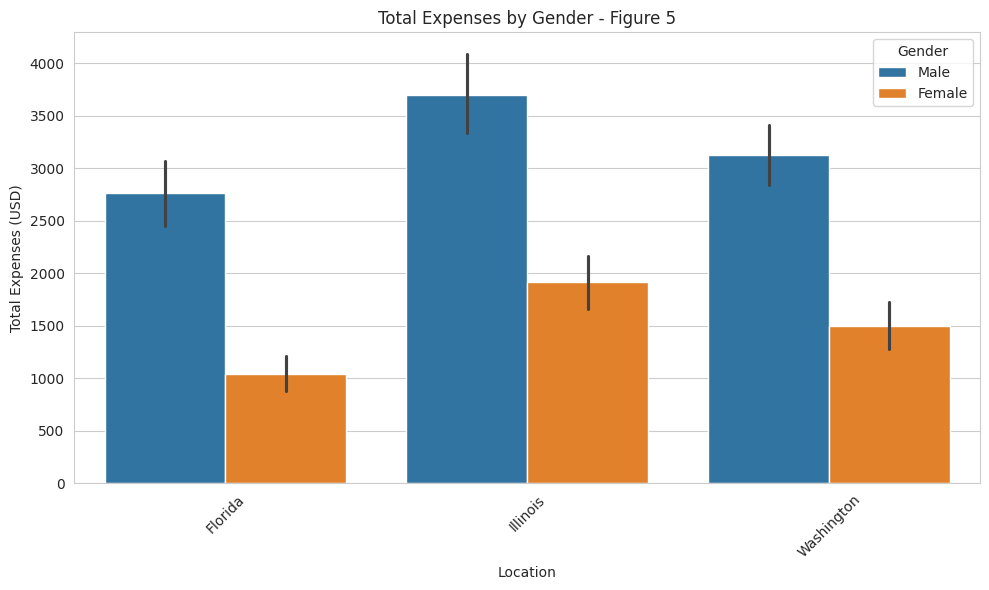

In [29]:

# Define the locations for each figure
locations_figures = [
    ['Kentucky', 'Maine', 'Massachusetts'],
    ['Rhode Island', 'Oregon', 'Wyoming'],
    ['Montana', 'Louisiana', 'West Virginia'],
    ['California', 'Texas', 'New York'],
    ['Florida', 'Washington', 'Illinois']
]

# Create a figure for each set of locations
for i, locations in enumerate(locations_figures, start=1):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df[df['Location'].isin(locations)], x='Location', y='Purchase Amount (USD)', hue='Gender', estimator=sum)
    plt.title(f'Total Expenses by Gender - Figure {i}')
    plt.xlabel('Location')
    plt.ylabel('Total Expenses (USD)')
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_84867/731971630.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Rating Range'] = pd.cut(filtered_df['Review Rating'], bins=rating_ranges, labels=False)


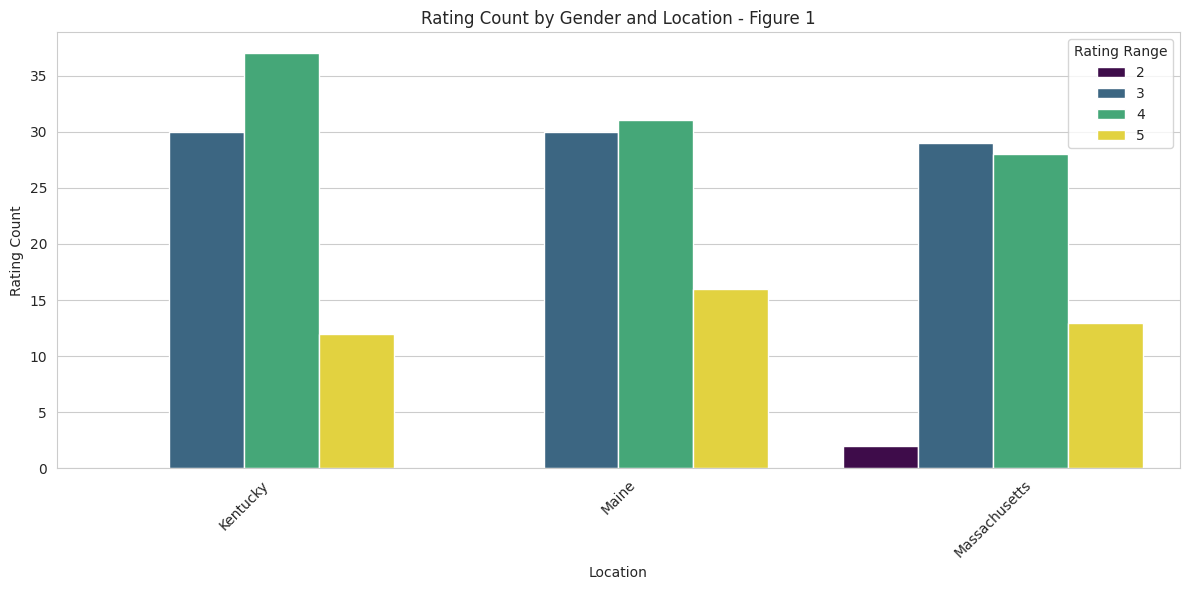

/tmp/ipykernel_84867/731971630.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Rating Range'] = pd.cut(filtered_df['Review Rating'], bins=rating_ranges, labels=False)


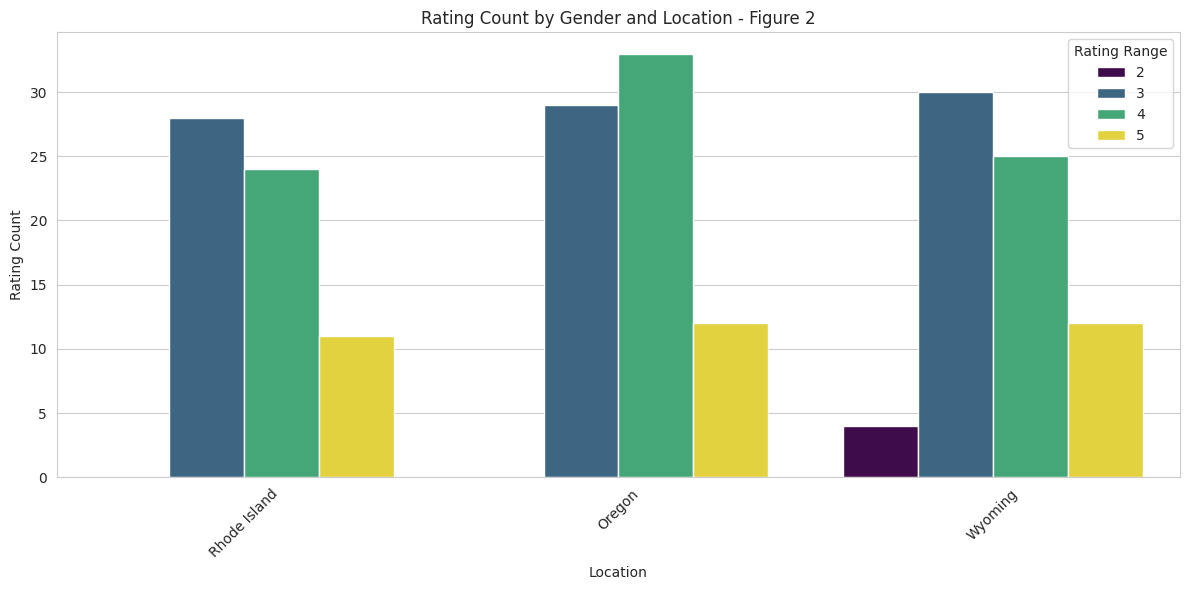

/tmp/ipykernel_84867/731971630.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Rating Range'] = pd.cut(filtered_df['Review Rating'], bins=rating_ranges, labels=False)


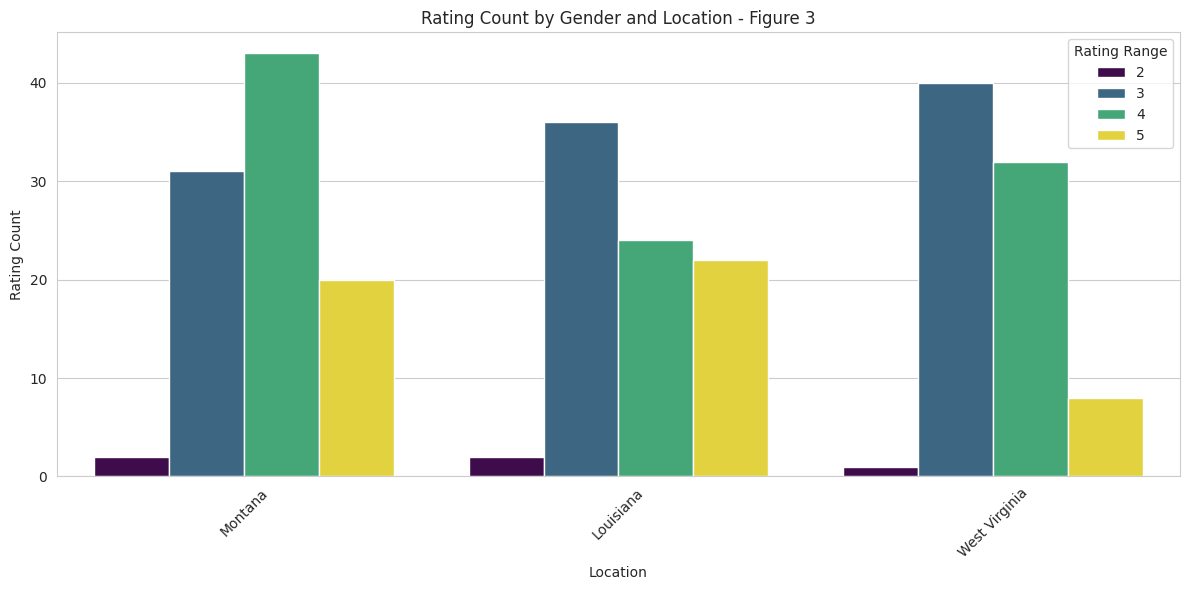

/tmp/ipykernel_84867/731971630.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Rating Range'] = pd.cut(filtered_df['Review Rating'], bins=rating_ranges, labels=False)


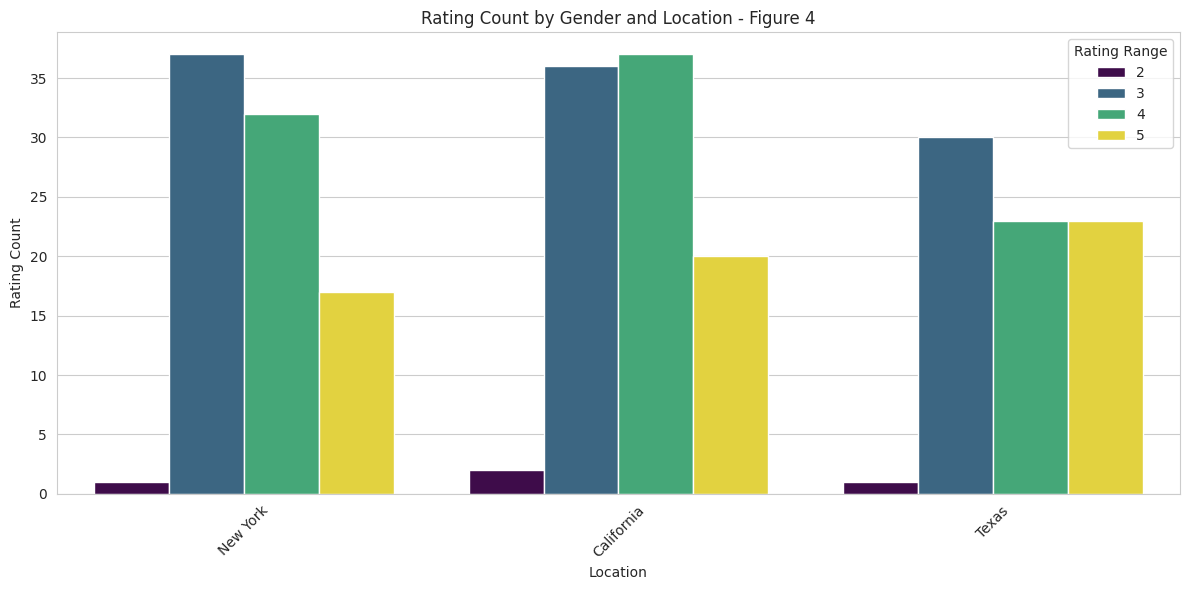

/tmp/ipykernel_84867/731971630.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Rating Range'] = pd.cut(filtered_df['Review Rating'], bins=rating_ranges, labels=False)


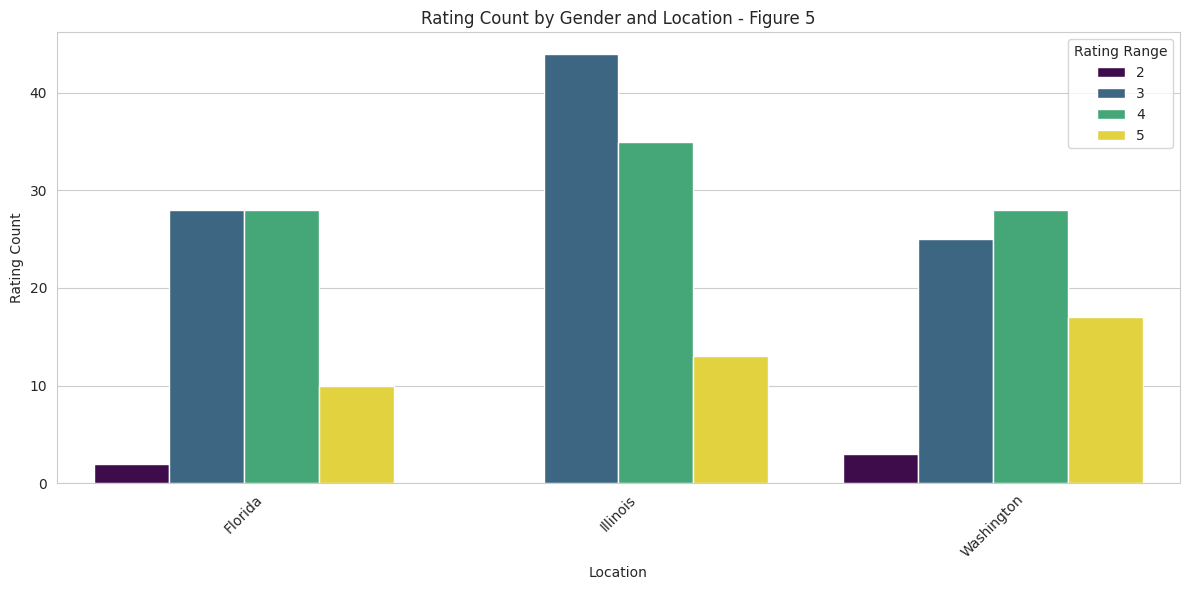

In [36]:
# Define the locations for each figure
locations_figures = [
    ['Kentucky', 'Maine', 'Massachusetts'],
    ['Rhode Island', 'Oregon', 'Wyoming'],
    ['Montana', 'Louisiana', 'West Virginia'],
    ['California', 'Texas', 'New York'],
    ['Florida', 'Washington', 'Illinois']
]

# Define the rating ranges
rating_ranges = [0, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

# Create a figure for each set of locations
for i, locations in enumerate(locations_figures, start=1):
    plt.figure(figsize=(12, 6))
    
    # Filter the DataFrame for the specified locations
    filtered_df = df[df['Location'].isin(locations)]
    
    # Bin the review ratings into the specified ranges
    filtered_df['Rating Range'] = pd.cut(filtered_df['Review Rating'], bins=rating_ranges, labels=False)
    
    # Create the bar plot
    sns.countplot(data=filtered_df, x='Location', hue='Rating Range', palette='viridis')
    
    plt.title(f'Rating Count by Gender and Location - Figure {i}')
    plt.xlabel('Location')
    plt.ylabel('Rating Count')
    plt.legend(title='Rating Range', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
